In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy
from scipy.misc.pilutil import imread

sns.set()

import os
print(os.listdir("./input"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test_images', 'train.csv', 'train_images']


In [2]:
sample_submission = pd.read_csv("./input/sample_submission.csv")
print('sample_submission.shape:', sample_submission.shape)
sample_submission.head()

sample_submission.shape: (11702, 2)


,Id,Predicted
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0


In [3]:
train = pd.read_csv("./input/train.csv")

print('train.shape:', train.shape)
train.head()

train.shape: (31072, 2)


,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


# 1) Class Distribution
## Which proteins occur most often in train images?

In [4]:
labels = []
nr_words = []

for row in range(len(train)):
    label = train['Target'].iloc[row].split(' ')
    nr_word = len(label)
    
    labels += label
    nr_words.append(nr_word)
    
labels = np.array(labels)
train['nr_Target'] = nr_words

In [5]:
print('len(labels):', len(labels))
labels

len(labels): 50782


array(['16', '0', '7', ..., '21', '2', '0'], dtype='<U2')

In [6]:
labels = pd.DataFrame(labels, columns=['Class'])

In [7]:
labels['Class'].value_counts()

0     12885
25     8228
21     3777
2      3621
23     2965
7      2822
5      2513
4      1858
3      1561
19     1482
1      1254
11     1093
14     1066
6      1008
18      902
22      802
12      688
13      537
16      530
26      328
24      322
17      210
20      172
8        53
9        45
10       28
15       21
27       11
Name: Class, dtype: int64

In [8]:
print('Ratio (1st/Total):', labels['Class'].value_counts()[0]/labels['Class'].count())
print('Ratio (2nd/Total):', labels['Class'].value_counts()[1]/labels['Class'].count())
print('Ratio (3rd/Total):', labels['Class'].value_counts()[2]/labels['Class'].count())

Ratio (1st/Total): 0.25373163719428143
Ratio (2nd/Total): 0.16202591469418298
Ratio (3rd/Total): 0.074376747666496


Text(0, 0.5, 'No. of target')

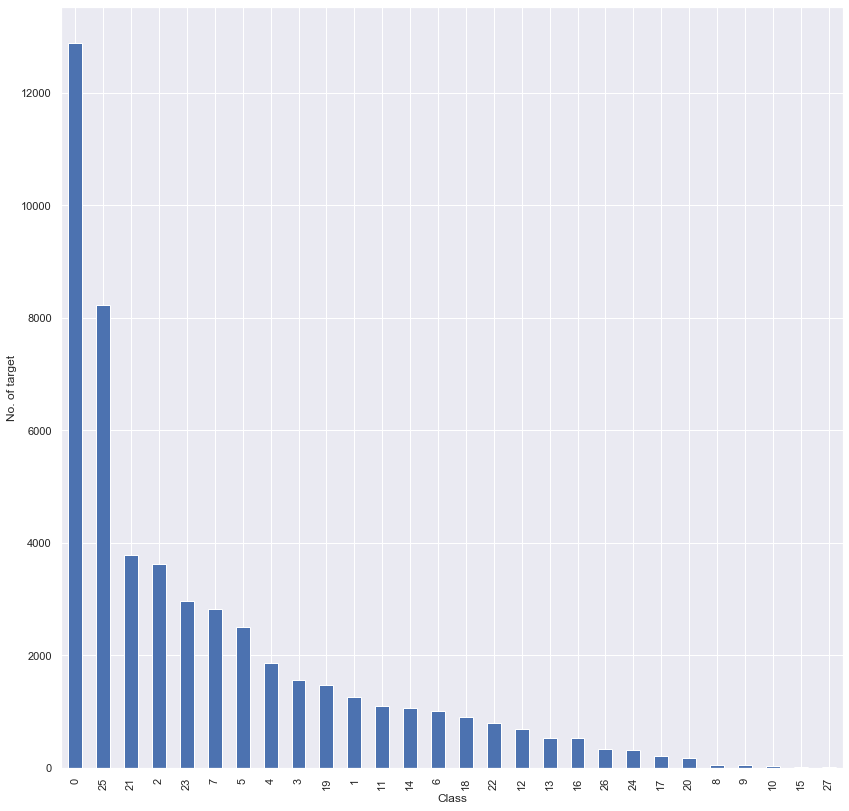

In [9]:
plt.figure(figsize=(14,14))
labels['Class'].value_counts().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("No. of target")

# 2) Target Distribution
## No. of targets per image

In [10]:
train['nr_Target'].value_counts()

1    15126
2    12485
3     3160
4      299
5        2
Name: nr_Target, dtype: int64

In [11]:
print('Ratio (1st/Total):', train['nr_Target'].value_counts()[1]/train['nr_Target'].count())
print('Ratio (2nd/Total):', train['nr_Target'].value_counts()[2]/train['nr_Target'].count())
print('Ratio (3rd/Total):', train['nr_Target'].value_counts()[3]/train['nr_Target'].count())

Ratio (1st/Total): 0.4868048403707518
Ratio (2nd/Total): 0.4018087023686921
Ratio (3rd/Total): 0.10169927909371781


Text(0, 0.5, 'No. of image')

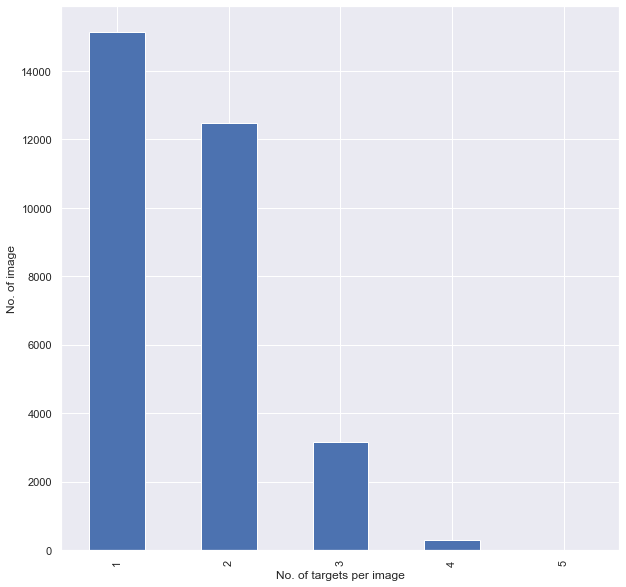

In [12]:
plt.figure(figsize=(10,10))
train['nr_Target'].value_counts().plot(kind='bar')
plt.xlabel("No. of targets per image")
plt.ylabel("No. of image")

# Show Images

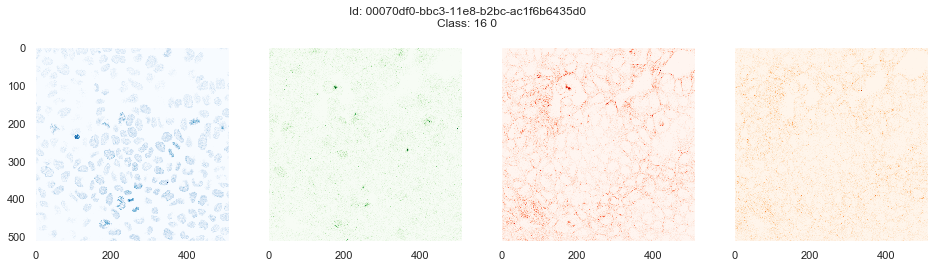

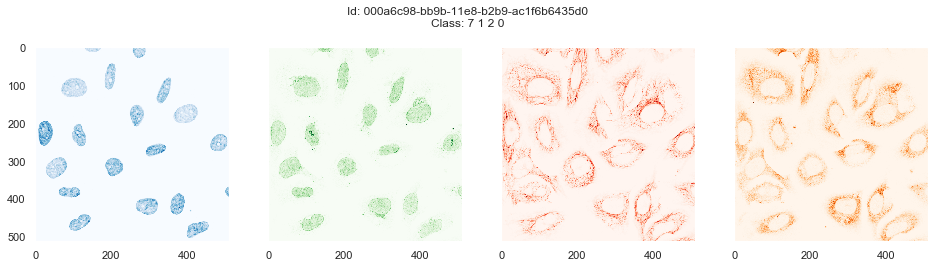

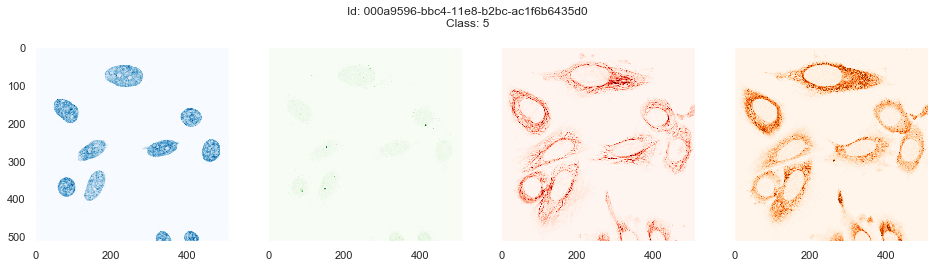

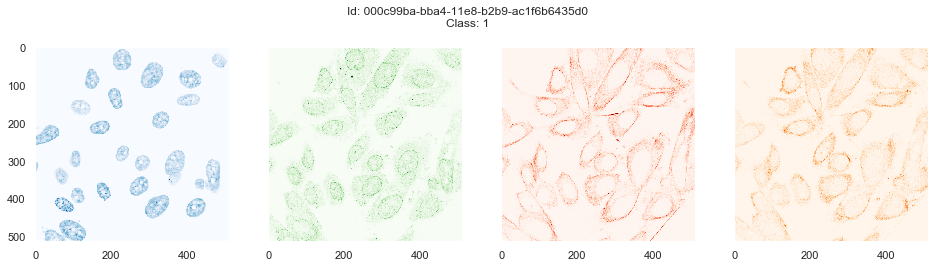

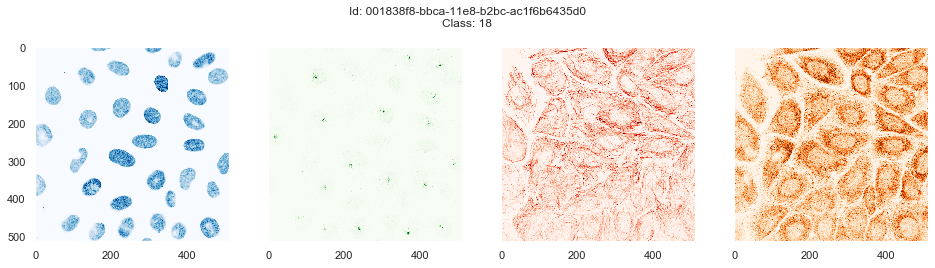

In [13]:
rows = 5

for i in range(rows):
    fn = train['Id'].iloc[i]
    
    fig ,ax = plt.subplots(1,4,
                           sharex='col',sharey='row',
                           figsize=(16,4))
    
    ax[0].grid(False)
    ax[1].grid(False)
    ax[2].grid(False)
    ax[3].grid(False)
    
    plt.suptitle('Id: '+str(train['Id'].iloc[i])+'\nClass: '+str(train['Target'].iloc[i]))
    
    img_b = imread( './input/train_images/'+fn+'_blue.png')
    img_g = imread( './input/train_images/'+fn+'_green.png')
    img_r = imread( './input/train_images/'+fn+'_red.png')
    img_y = imread( './input/train_images/'+fn+'_yellow.png')

    ax[0].imshow(img_b, cmap="Blues")
    ax[1].imshow(img_g, cmap="Greens")
    ax[2].imshow(img_r, cmap="Reds")
    ax[3].imshow(img_y, cmap="Oranges")